# Importando bibliotecas, lendo apenas as colunas necessárias e imprimindo apenas cinco linhas com a função .head()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = data = pd.read_csv("/home/mauro/Área de Trabalho/enade/microdados_Enade_2017_portal_2018.10.09/3.DADOS/MICRODADOS_ENADE_2017.txt", delimiter=';', encoding='iso-8859-1',  usecols=['NU_ANO', 'CO_GRUPO', 'TP_SEXO'])
df.sample(3)

,NU_ANO,CO_GRUPO,TP_SEXO
62487,2017,3201,M
420636,2017,6306,F
250960,2017,3502,F


**Distribuição dos alunos por curso no enem em um universo de todos os cursos**

Text(0, 0.5, 'Alunos')

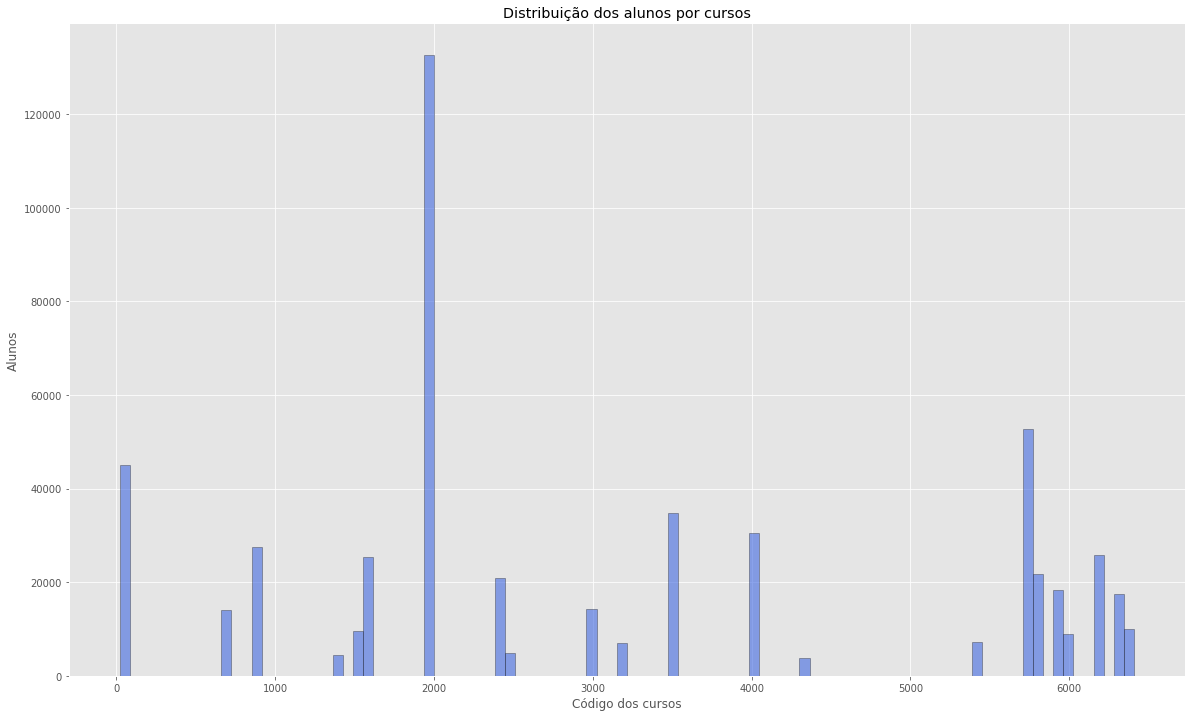

In [2]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["CO_GRUPO"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição dos alunos por cursos")
plt.xlabel("Código dos cursos")
plt.ylabel("Alunos")

**Usando a função loc para selecionar a coluna que contém os dados desejados e a função count para saber a quantidade de alunos nos cursos.**

In [3]:
df = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4003) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==6409)]
df.count()

NU_ANO      51012
CO_GRUPO    51012
TP_SEXO     51012
dtype: int64

**Usando a função loc para selecionar a coluna que contém os dados desejados e a função assign para criar uma nova coluna de nome curso.**

In [4]:
df = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4003) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==6409)].assign(curso=df.CO_GRUPO) 
df.head(2)

,NU_ANO,CO_GRUPO,TP_SEXO,curso
383,2017,4004,M,4004
384,2017,4004,M,4004


**Criando a função define_nome para converter o código do curso em nome do curso.**

In [5]:
def define_nome(num):
    if num == 72:
        return 'TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SISTEMAS'
    elif num == 79:
        return 'TECNOLOGIA EM REDES DE COMPUTADORES'
    elif num == 4003:
        return 'ENGENHARIA DA COMPUTAÇÃO'
    elif num == 4004:
        return 'CIENCIA DA COMPUTAÇÃO (BACHARELADO)'
    elif num == 4005:
        return 'CIENCIA DA COMPUTAÇÃO (LICENCIATURA)'
    elif num == 4006:
        return 'SISTEMAS DE INFORMAÇÃO'
    elif num == 6409:
        return 'TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO'   
    
df['curso'] = df['CO_GRUPO'].map(define_nome)
df.sample(15)

,NU_ANO,CO_GRUPO,TP_SEXO,curso
465658,2017,72,M,TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SIS...
219301,2017,4005,M,CIENCIA DA COMPUTAÇÃO (LICENCIATURA)
445943,2017,4006,F,SISTEMAS DE INFORMAÇÃO
290814,2017,72,M,TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SIS...
105399,2017,4004,M,CIENCIA DA COMPUTAÇÃO (BACHARELADO)
183365,2017,4006,M,SISTEMAS DE INFORMAÇÃO
507600,2017,6409,M,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO
25874,2017,4004,M,CIENCIA DA COMPUTAÇÃO (BACHARELADO)
233006,2017,72,M,TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SIS...
497329,2017,72,M,TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SIS...


**Imprimindo o número de alunos por curso da área de TI, a legenda dos códigos dos cursos está no rodapé.**

In [6]:
dfTotal = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4003) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==6409)] 
dfTotal['CO_GRUPO'].value_counts()

4006    14990
72      12538
4004    10186
6409     4566
4003     3913
79       3342
4005     1477
Name: CO_GRUPO, dtype: int64

**Contando o número total de alunos por gênero de sexo na área de TI.<br> São 43.840 alunos do sexo masculino, 7.172 do sexo feminino.**

In [7]:
dfAlunos = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4003) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==6409) & df['TP_SEXO']==1] 
dfAlunos['TP_SEXO'].value_counts()

M    43840
F     7172
Name: TP_SEXO, dtype: int64

**Gráfico pizza com os gêneros informados, esse ano não houve alunos sem informação de gênero.**


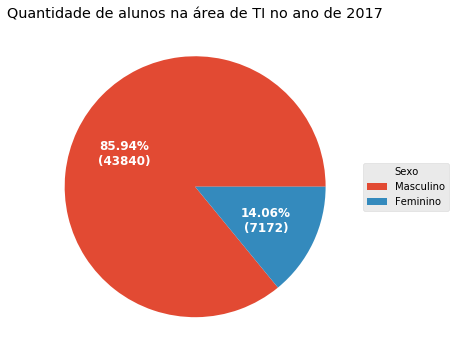

In [8]:
# Aqui criamos a área que plotamos o gráfico e definimos seu tamanho
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect='equal'))
# Criando nosso conjunto de dados
sexo = ['Masculino', 'Feminino']
quant = [43840, 7172] 


# Aqui serão colocados os alunos e as porcentagens no gráfico
def func(pct, allvals):
    # calc %
    absolute = int(round(pct/100.*np.sum(allvals)))
    # fazendo legenda do gráfico com % e Nº de Alunos
    return "{:.2f}%\n({:d})".format(pct, absolute)
    
# Criando o gráfico e colocando a função da legenda interna 
wedges, texts, autotexts = ax.pie(quant, autopct=lambda pct: func(pct, quant),
                                  textprops=dict(color="w"))

# Definindo a caixa de legenda externa, título, localização e onde vai aparecer
ax.legend(wedges, sexo,
          title="Sexo",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=12, weight="bold")

# Título do gráfico
ax.set_title("Quantidade de alunos na área de TI no ano de 2017")

# Mostrando o gráfico
plt.show()

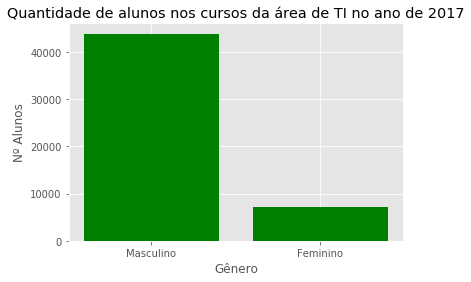

In [9]:
# Um gráfico com a relação entre alunos do sexo masculino e feminino
sexo = ['Masculino', 'Feminino']
quant = [43840, 7172] 

"""
    Chamamos o método bar que criará o gráfico de barra 
    passamos os argumentos que são: 
        - sexo como eixo x 
        - quant como eixo y
        - color para as cores das barras como green ( verde )
"""
plt.bar(sexo, quant, color='green')

# Aqui definimos as legendas de cada barra no eixo X
plt.xticks(sexo)

# A label para o eixo Y
plt.ylabel('Nº Alunos')

# A label para o eixo X
plt.xlabel('Gênero')


# O título do gráfico
plt.title('Quantidade de alunos nos cursos da área de TI no ano de 2017')
 
# Chamamos o método show() para mostrar o gráfico na tela
plt.show()

# Legendas:
### Coluna sexo
**F** : Feminino<br>
**M** : Masculino<br>
**N** : Não Informado
### Coluna Curso

**72 -** TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SISTEMAS<br>
**79 -** TECNOLOGIA EM REDES DE COMPUTADORES<br>
**4003 -** ENGENHARIA DA COMPUTAÇÃO <br>
**4004 -** CIÊNCIA DA COMPUTAÇÃO (BACHARELADO)<br>
**4005 -** CIÊNCIA DA COMPUTAÇÃO (LICENCIATURA)<br>
**4006 -** SISTEMAS DE INFORMAÇÃO<br>
**6409 -** TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO

## Observação 
#### O enade mudou o formato de seus dados, como mudanças eles trouxeram:
**Formato do arquivo:** Mudou de csv para txt<br>
**Nome das colunas:** Agora as colunas são nomeadas em CAIXA ALTA<br>
**Sexo dos alunos:** Mudou-se do formato numérico (1, 2) para o formato alfabético (M, F, N). Foi incluído a possibilidade de não informar seu gênero sexual.